In [234]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [235]:
df = pd.read_csv("moviess.csv")

In [236]:
df.head(5)

,Rank,Release Group,$Worldwide,$Domestic,Domestic %,$Foreign,Foreign %,Year,Genres,Rating,Vote_Count,Original_Language,Production_Countries
0,1,Mission: Impossible II,546388108.0,215409889.0,39.4,330978219.0,60.6,2000,"Adventure, Action, Thriller",6.126/10,6741.0,en,United States of America
1,2,Gladiator,460583960.0,187705427.0,40.8,272878533.0,59.2,2000,"Action, Drama, Adventure",8.217/10,19032.0,en,"United Kingdom, United States of America"
2,3,Cast Away,429632142.0,233632142.0,54.4,196000000.0,45.6,2000,"Adventure, Drama",7.663/10,11403.0,en,United States of America
3,4,What Women Want,374111707.0,182811707.0,48.9,191300000.0,51.1,2000,"Comedy, Romance",6.45/10,3944.0,en,"United Kingdom, United States of America"
4,5,Dinosaur,349822765.0,137748063.0,39.4,212074702.0,60.6,2000,"Animation, Family, Adventure",6.544/10,2530.0,en,United States of America


In [237]:
df.shape

(5000, 13)

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  5000 non-null   int64  
 1   Release Group         5000 non-null   object 
 2   $Worldwide            5000 non-null   float64
 3   $Domestic             5000 non-null   float64
 4   Domestic %            5000 non-null   float64
 5   $Foreign              5000 non-null   float64
 6   Foreign %             5000 non-null   float64
 7   Year                  5000 non-null   int64  
 8   Genres                4822 non-null   object 
 9   Rating                4830 non-null   object 
 10  Vote_Count            4830 non-null   float64
 11  Original_Language     4830 non-null   object 
 12  Production_Countries  4800 non-null   object 
dtypes: float64(6), int64(2), object(5)
memory usage: 507.9+ KB


In [239]:
df.describe()

,Rank,$Worldwide,$Domestic,Domestic %,$Foreign,Foreign %,Year,Vote_Count
count,5000.00000,5.000000e+03,5.000000e+03,5000.000000,5.000000e+03,5000.000000,5000.000000,4830.000000
mean,100.50000,1.192137e+08,4.472523e+07,35.740620,7.448809e+07,64.256640,2012.000000,2531.585921
std,57.74008,2.005243e+08,7.727026e+07,30.656992,1.334932e+08,30.654531,7.211824,3946.272827
min,1.00000,1.666028e+06,0.000000e+00,0.000000,0.000000e+00,0.000000,2000.000000,0.000000
25%,50.75000,2.466220e+07,9.275150e+04,0.200000,1.371034e+07,42.200000,2006.000000,205.250000
50%,100.50000,4.844658e+07,1.798421e+07,37.050000,3.019444e+07,62.950000,2012.000000,1035.500000
75%,150.25000,1.197588e+08,5.386847e+07,57.800000,7.211578e+07,99.800000,2018.000000,3065.000000
max,200.00000,2.799439e+09,9.366622e+08,100.000000,1.993811e+09,100.000000,2024.000000,36753.000000


In [240]:
dup_data = df.duplicated().any()

In [241]:
dup_data

np.False_

In [242]:
df.isnull().sum()

Rank                      0
Release Group             0
$Worldwide                0
$Domestic                 0
Domestic %                0
$Foreign                  0
Foreign %                 0
Year                      0
Genres                  178
Rating                  170
Vote_Count              170
Original_Language       170
Production_Countries    200
dtype: int64

In [243]:
df.dropna(inplace = True)

In [244]:
df.isnull().sum()

Rank                    0
Release Group           0
$Worldwide              0
$Domestic               0
Domestic %              0
$Foreign                0
Foreign %               0
Year                    0
Genres                  0
Rating                  0
Vote_Count              0
Original_Language       0
Production_Countries    0
dtype: int64

In [245]:
df.columns

Index(['Rank', 'Release Group', '$Worldwide', '$Domestic', 'Domestic %',
       '$Foreign', 'Foreign %', 'Year', 'Genres', 'Rating', 'Vote_Count',
       'Original_Language', 'Production_Countries'],
      dtype='object')

In [246]:
df.drop(columns = ["$Foreign","$Domestic"],inplace = True)

In [247]:
df['Rating'] = (
    df['Rating']
    .astype(str)
    .str.extract(r'(\d+\.?\d*)')[0]
    .astype(float)
)

In [248]:
df.head()

,Rank,Release Group,$Worldwide,Domestic %,Foreign %,Year,Genres,Rating,Vote_Count,Original_Language,Production_Countries
0,1,Mission: Impossible II,546388108.0,39.4,60.6,2000,"Adventure, Action, Thriller",6.126,6741.0,en,United States of America
1,2,Gladiator,460583960.0,40.8,59.2,2000,"Action, Drama, Adventure",8.217,19032.0,en,"United Kingdom, United States of America"
2,3,Cast Away,429632142.0,54.4,45.6,2000,"Adventure, Drama",7.663,11403.0,en,United States of America
3,4,What Women Want,374111707.0,48.9,51.1,2000,"Comedy, Romance",6.450,3944.0,en,"United Kingdom, United States of America"
4,5,Dinosaur,349822765.0,39.4,60.6,2000,"Animation, Family, Adventure",6.544,2530.0,en,United States of America


In [249]:
mean_rating = df['Rating'].mean()
median_rating = df['Rating'].median()
mode_rating = df['Rating'].mode()

In [250]:
print("Mean Rating",mean_rating)
print("Median Rating",median_rating)
print("Mode Rating",mode_rating)

Mean Rating 6.5254156764644575
Median Rating 6.6
Mode Rating 0    6.5
Name: Rating, dtype: float64


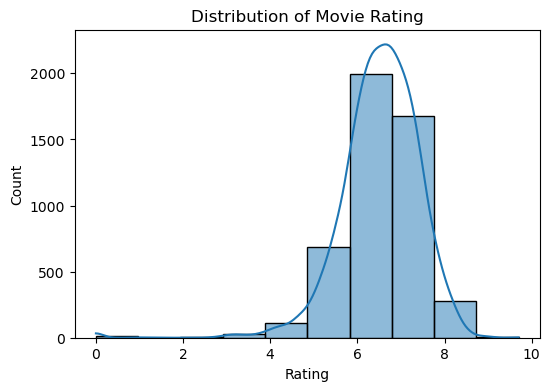

In [251]:
plt.figure(figsize =(6,4))
sns.histplot(df['Rating'],bins = 10,kde=True)
plt.title("Distribution of Movie Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


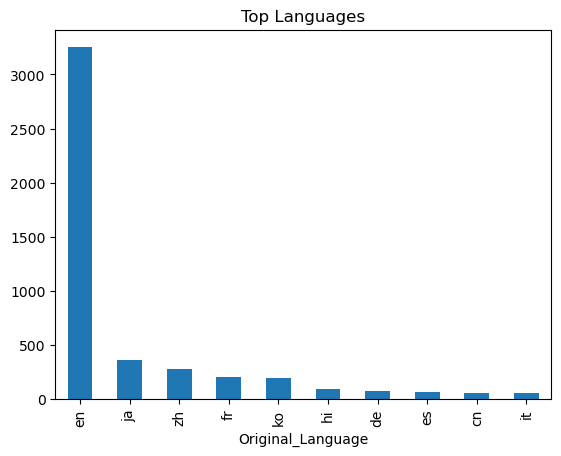

In [252]:
df['Original_Language'].value_counts().head(10).plot(kind='bar')
plt.title("Top Languages")
plt.show()

Text(0.5, 1.0, 'Index vs Rating')

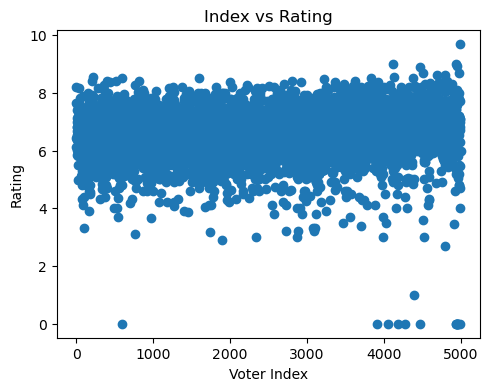

In [253]:
# plt.scatter(df['Vote_Count'],df['Rating'])
# plt.xlabel("Vote Count")
# plt.ylabel("Rating")
# plt.title("Voters vs Rating")
# plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(df.index, df['Rating'])
plt.xlabel("Voter Index")
plt.ylabel("Rating")
plt.title("Index vs Rating")


Text(0.5, 1.0, 'Year vs Rating')

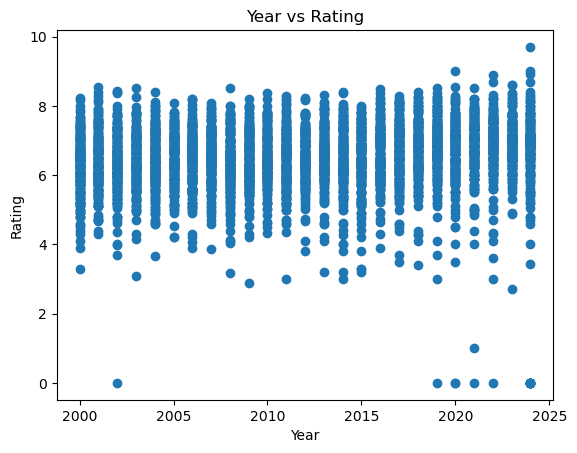

In [254]:
plt.scatter(df['Year'],df['Rating'])
plt.xlabel("Year")
plt.ylabel("Rating")
plt.title("Year vs Rating")

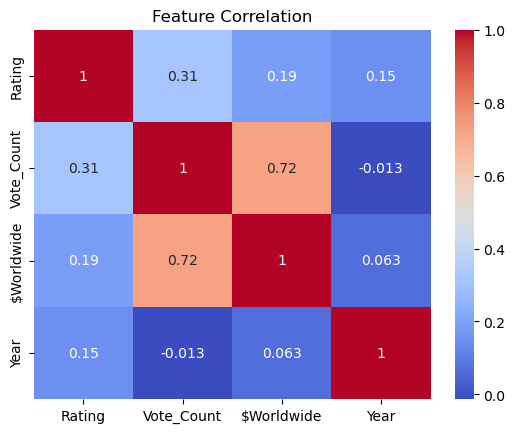

In [255]:
numeric_cols = ['Rating', 'Vote_Count', '$Worldwide','Year']
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


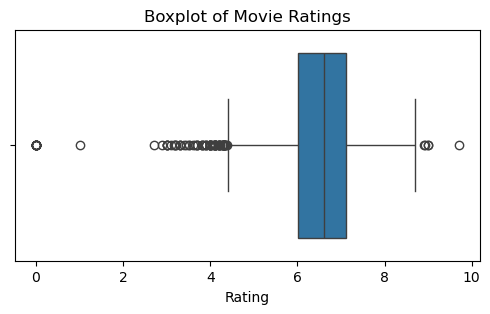

In [256]:
plt.figure(figsize = (6,3))
sns.boxplot(x =df['Rating'])
plt.title("Boxplot of Movie Ratings")
plt.show()

In [257]:
top_movies = df.sort_values(by='Rating', ascending=False).head(10)
top_movies[['Release Group', 'Rating']].reset_index(drop=True)

,Release Group,Rating
0,Attack on Titan the Movie: The Last Attack,9.700
1,Break the Silence: The Movie,9.000
2,The Enchanted Tinderbox,9.000
3,I'm Still Here,8.917
4,BTS Permission to Dance on Stage - Seoul: Live...,8.900
5,Uma Musume: Pretty Derby - Beginning of a New Era,8.700
6,Godfather,8.690
7,Renaissance: A Film by Beyoncé,8.600
8,Pretty Cure All Stars F,8.600
9,Spirited Away,8.538


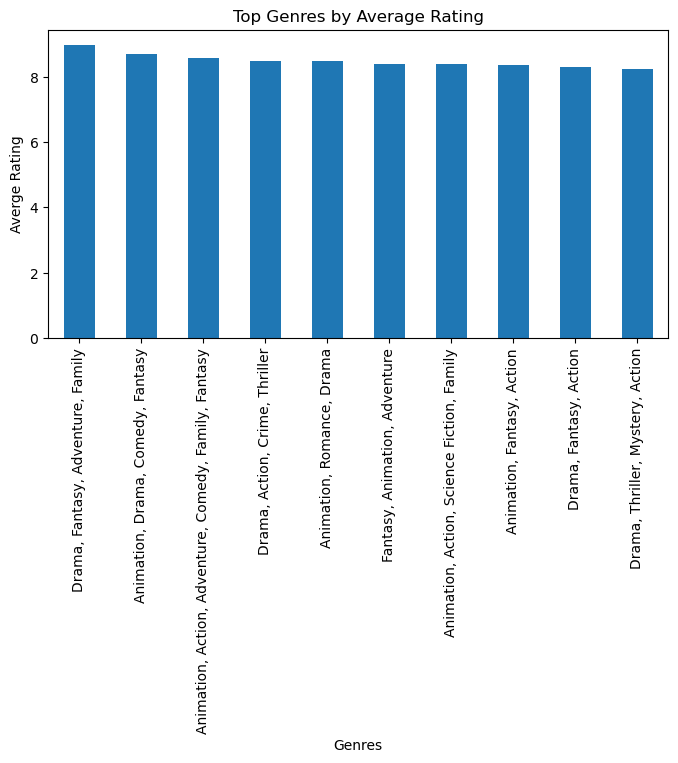

In [258]:
genre_avg = df.groupby('Genres')['Rating'].mean().sort_values(ascending = False)
plt.figure(figsize = (8,4))
genre_avg.head(10).plot(kind='bar')
plt.title("Top Genres by Average Rating")
plt.xlabel("Genres")
plt.ylabel("Averge Rating")
plt.show()

In [259]:
df.columns

Index(['Rank', 'Release Group', '$Worldwide', 'Domestic %', 'Foreign %',
       'Year', 'Genres', 'Rating', 'Vote_Count', 'Original_Language',
       'Production_Countries'],
      dtype='object')

In [260]:

data = df[['Year', 'Vote_Count', 'Rating']].dropna()
X = data[['Year', 'Vote_Count']]
y = data['Rating']

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [262]:
model = RandomForestRegressor(n_estimators=100,random_state=42)

In [263]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [264]:
y_pred = model.predict(X_test)

In [265]:
y_pred[:10]

array([6.65181   , 6.19709   , 6.64176   , 5.42392667, 6.13417   ,
       6.37787   , 6.60147167, 6.77473   , 6.95314   , 6.62463   ])

In [266]:

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Mean_Absolute_Error(mae) :", mae)
print("Mean_Squared_Error(rmse):", rmse)
print("r2_Score(r2)  :", r2)

Mean_Absolute_Error(mae) : 0.6720242918733466
Mean_Squared_Error(rmse): 0.8612807133629041
r2_Score(r2)  : 0.16993488983170324


In [267]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R2:", adjusted_r2)

Adjusted R2: 0.16820016650846759


In [268]:
import pickle
with open('movie_rating_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [269]:
with open('movie_rating_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [270]:
y_pred = loaded_model.predict(X_test)
print("Model and scaler saved successfully!")